In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.cluster import DBSCAN, KMeans

In [2]:
location = "okcupid_profiles.csv"
data = pd.read_csv(location)

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59946 entries, 0 to 59945
Data columns (total 31 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          59946 non-null  int64  
 1   status       59946 non-null  object 
 2   sex          59946 non-null  object 
 3   orientation  59946 non-null  object 
 4   body_type    54650 non-null  object 
 5   diet         35551 non-null  object 
 6   drinks       56961 non-null  object 
 7   drugs        45866 non-null  object 
 8   education    53318 non-null  object 
 9   ethnicity    54266 non-null  object 
 10  height       59943 non-null  float64
 11  income       59946 non-null  int64  
 12  job          51748 non-null  object 
 13  last_online  59946 non-null  object 
 14  location     59946 non-null  object 
 15  offspring    24385 non-null  object 
 16  pets         40025 non-null  object 
 17  religion     39720 non-null  object 
 18  sign         48890 non-null  object 
 19  smok

Variables numericas: age, height, income
Variables que sacamos por ahora: last_online, todos los essays
Variables con nulls=

In [4]:
#Para las variables categóricas
def completar_nodijo(columna):
    mask_null = columna.isnull()
    columna[mask_null] = "rather not say"
    

In [5]:
columnas_cat_a_modificar = ['status', 'sex', 'orientation', 'body_type', 'diet', 'drinks',
       'drugs', 'education', 'ethnicity','job', 'location', 'offspring', 'pets', 'religion', 'sign',
       'smokes', 'speaks']

In [6]:
for i in columnas_cat_a_modificar:
    completar_nodijo(data[i])

C:\Users\Alan\AppData\Local\Temp\ipykernel_17180\1023053484.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  columna[mask_null] = "rather not say"


In [7]:
data.drugs.value_counts()

never             37724
rather not say    14080
sometimes          7732
often               410
Name: drugs, dtype: int64

In [8]:
#Columnas que no vamos a utilizar ahora
columnas_no_utilizadas = ['essay0', 'essay1', 'essay2', 'essay3', 'essay4',
       'essay5', 'essay6', 'essay7', 'essay8', 'essay9']

In [9]:
data_essays = data[columnas_no_utilizadas]

In [10]:
data = data.drop(columnas_no_utilizadas, axis=1)

In [11]:
data.height[data.height.isnull()] = -1
#Seria más prolijo hacerlo con un fill na

C:\Users\Alan\AppData\Local\Temp\ipykernel_17180\3026053226.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.height[data.height.isnull()] = -1


In [12]:
data.income.isnull().sum()

0

In [13]:
data.age.isnull().sum()

0

In [14]:
data_last_online = data.pop("last_online")

## **Vamos a separar el dataset en variables categóricas y nominales**
Revisar después cuando hagan el laburo en fino de las columnas

In [15]:
data_cat = data[columnas_cat_a_modificar]
data_cat_speaks = data_cat.pop("speaks")
data_cat_ethnicity = data_cat.pop("ethnicity")
data_cat_sign = data_cat.pop("sign")
data_cat_religion = data_cat.pop("religion")
data_nom = data[["age", "height", "income"]]

In [16]:
data_cat.status.value_counts()

single            55697
seeing someone     2064
available          1865
married             310
unknown              10
Name: status, dtype: int64

# Modelado con K-Models

Utilización de K-Models para análisis de variables categóricas

In [17]:
# Se realiza una copia de dataset

data_cat_copy = data_cat.copy()
data_cat_copy.head(5)

,status,sex,orientation,body_type,diet,drinks,drugs,education,job,location,offspring,pets,smokes
0,single,m,straight,a little extra,strictly anything,socially,never,working on college/university,transportation,"south san francisco, california","doesn't have kids, but might want them",likes dogs and likes cats,sometimes
1,single,m,straight,average,mostly other,often,sometimes,working on space camp,hospitality / travel,"oakland, california","doesn't have kids, but might want them",likes dogs and likes cats,no
2,available,m,straight,thin,anything,socially,rather not say,graduated from masters program,rather not say,"san francisco, california",rather not say,has cats,no
3,single,m,straight,thin,vegetarian,socially,rather not say,working on college/university,student,"berkeley, california",doesn't want kids,likes cats,no
4,single,m,straight,athletic,rather not say,socially,never,graduated from college/university,artistic / musical / writer,"san francisco, california",rather not say,likes dogs and likes cats,no


In [18]:
# Preparación de dataframe
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
data_cat_copy = data_cat_copy.apply(le.fit_transform)
data_cat_copy.head(10)

,status,sex,orientation,body_type,diet,drinks,drugs,education,job,location,offspring,pets,smokes
0,3,1,2,0,11,5,0,25,19,175,2,14,2
1,3,1,2,2,6,2,3,31,8,118,2,14,0
2,0,1,2,10,0,5,2,12,14,155,14,5,0
3,3,1,2,10,18,5,2,25,18,16,4,10,0
4,3,1,2,1,10,5,0,9,0,155,14,14,0
5,3,1,2,2,3,5,2,9,3,155,2,10,0
6,3,0,2,4,11,5,0,9,14,155,14,14,1
7,3,0,2,2,3,5,0,9,0,155,3,14,0
8,3,0,2,8,11,5,2,9,14,14,0,14,4
9,3,1,2,1,3,1,0,32,18,161,14,14,0


In [19]:
data_cat_copy.smokes.value_counts()

0    43896
1     5512
2     3787
4     3040
5     2231
3     1480
Name: smokes, dtype: int64

In [20]:
from kmodes.kmodes import KModes
km_cao = KModes(n_clusters=2, init = "Cao", n_init = 10, verbose=1)
fitClusters_cao = km_cao.fit_predict(data_cat_copy)

Initialization method and algorithm are deterministic. Setting n_init to 1.
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 4552, cost: 334396.0


In [21]:
#Predicción de cluster
fitClusters_cao

array([0, 0, 0, ..., 0, 1, 0], dtype=uint16)

In [22]:
clusterCentroidsDf = pd.DataFrame(km_cao.cluster_centroids_)
clusterCentroidsDf.columns = data_cat_copy.columns

In [23]:
# Moda de clusters
clusterCentroidsDf

,status,sex,orientation,body_type,diet,drinks,drugs,education,job,location,offspring,pets,smokes
0,3,1,2,2,10,5,0,9,14,155,14,15,0
1,3,0,2,4,3,5,2,12,12,155,0,14,0


In [24]:
cost = []
for num_clusters in list(range(1,10)):
    kmode = KModes(n_clusters=num_clusters, init = "Cao", n_init = 1, verbose=1)
    kmode.fit_predict(data_cat_copy)
    cost.append(kmode.cost_)

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 354580.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 4552, cost: 334396.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 4474, cost: 330064.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 8105, cost: 319151.0
Run 1, iteration: 2/100, moves: 634, cost: 319151.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 10934, cost: 312948.0
Run 1, iteration: 2/100, moves: 610, cost: 312948.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 8343, cost: 312453.0
Run 1, iteration: 2/100, moves: 395, cost: 312453.0
Init: initializing centroids
Init: initializing 

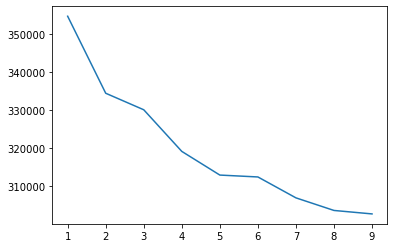

In [25]:
y = np.array([i for i in range(1,10,1)])
plt.plot(y,cost)

In [26]:
# Se eligen 5 clusters
km_cao = KModes(n_clusters=5, init = "Cao", n_init = 1, verbose=1)
fitClusters_cao = km_cao.fit_predict(data_cat_copy)

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 10934, cost: 312948.0
Run 1, iteration: 2/100, moves: 610, cost: 312948.0


In [27]:
fitClusters_cao

array([4, 4, 0, ..., 0, 2, 0], dtype=uint16)

In [28]:
#clusterCentroidsDf = pd.DataFrame(km_cao.cluster_centroids_)
#clusterCentroidsDf.columns = data_cat_copy.columns

In [29]:
# Moda de clusters
#clusterCentroidsDf

Se combinan los cluster predichos con el DF original

In [30]:
data_cat_copy = data_cat.reset_index()


In [31]:
clustersDf = pd.DataFrame(fitClusters_cao)
clustersDf.columns = ['cluster_predicho']
combinadoDf = pd.concat([data_cat_copy, clustersDf], axis = 1).reset_index()
combinadoDf = combinadoDf.drop(['index', 'level_0'], axis = 1)

In [32]:
combinadoDf.head()

,status,sex,orientation,body_type,diet,drinks,drugs,education,job,location,offspring,pets,smokes,cluster_predicho
0,single,m,straight,a little extra,strictly anything,socially,never,working on college/university,transportation,"south san francisco, california","doesn't have kids, but might want them",likes dogs and likes cats,sometimes,4
1,single,m,straight,average,mostly other,often,sometimes,working on space camp,hospitality / travel,"oakland, california","doesn't have kids, but might want them",likes dogs and likes cats,no,4
2,available,m,straight,thin,anything,socially,rather not say,graduated from masters program,rather not say,"san francisco, california",rather not say,has cats,no,0
3,single,m,straight,thin,vegetarian,socially,rather not say,working on college/university,student,"berkeley, california",doesn't want kids,likes cats,no,4
4,single,m,straight,athletic,rather not say,socially,never,graduated from college/university,artistic / musical / writer,"san francisco, california",rather not say,likes dogs and likes cats,no,0


Identificación de clusters

In [33]:
cluster_0 = combinadoDf[combinadoDf['cluster_predicho'] == 0]
cluster_1 = combinadoDf[combinadoDf['cluster_predicho'] == 1]
cluster_2 = combinadoDf[combinadoDf['cluster_predicho'] == 2]
cluster_3 = combinadoDf[combinadoDf['cluster_predicho'] == 3]
cluster_4 = combinadoDf[combinadoDf['cluster_predicho'] == 4]

# TextMining

In [34]:
#EJECUTAR ESTO UNA SOLA VEZ (si nunca lo hicieron para descargar stopwords y demás)
#import nltk
#nltk.download('stopwords') 
#nltk.download('wordnet')    
#nltk.download('omw-1.4')
#nltk.download('averaged_perceptron_tagger')

In [35]:
import nltk
from nltk.corpus import stopwords
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer
from nltk.stem.porter import PorterStemmer
from nltk.tokenize import RegexpTokenizer
from collections import Counter
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import TfidfVectorizer
import re
import string

In [36]:
data_essays.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59946 entries, 0 to 59945
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   essay0  54458 non-null  object
 1   essay1  52374 non-null  object
 2   essay2  50308 non-null  object
 3   essay3  48470 non-null  object
 4   essay4  49409 non-null  object
 5   essay5  49096 non-null  object
 6   essay6  46175 non-null  object
 7   essay7  47495 non-null  object
 8   essay8  40721 non-null  object
 9   essay9  47343 non-null  object
dtypes: object(10)
memory usage: 4.6+ MB


In [37]:
data_essays.essay0.isnull().sum()

5488

In [38]:
#Completa essay0 con stopword 
def completa_stopword(columna):
    mask_null = columna.isnull()
    columna[mask_null] = "me"
    return columna

In [39]:
e0_ = completa_stopword(data_essays["essay0"])

In [40]:
df_e0 = pd.DataFrame(e0_)

In [41]:
df_e0

,essay0
0,about me: i would love to think that i was so...
1,i am a chef: this is what that means. 1. i am ...
2,"i'm not ashamed of much, but writing public te..."
3,i work in a library and go to school. . .
4,hey how's it going? currently vague on the pro...
...,...
59941,"vibrant, expressive, caring optimist. i love b..."
59942,i'm nick. i never know what to write about mys...
59943,"hello! i enjoy traveling, watching movies, and..."
59944,"""all i have in this world are my balls and my ..."


In [42]:
df_e0.essay0.isnull().sum()

0

In [43]:
stopwords_adic = ["hey", "hows", "whats", "cant", "dont", "ive", "id", "doesnt", "youre", "youve", "youll", "youd", "hes", "shes", "shouldve", "aint", "arent", "couldnt", "didnt", "doesnt", "hadnt", "hasnt", "havent", "im", "isnt", "shouldnt", "wasnt", "werent","wont","wouldnt", "san", "francisco", "sf", "bay", "area", "city"]

In [44]:
import nltk
from nltk.corpus import stopwords
from nltk.corpus import wordnet
from nltk.stem.snowball import SnowballStemmer
from nltk.stem import WordNetLemmatizer
from nltk.stem.porter import PorterStemmer
from nltk.tokenize import RegexpTokenizer
from collections import Counter
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import TfidfVectorizer
import re
import string

In [55]:
class ProcesadorTexto:

    def minusculas(self, df, columna):
        df[columna] = df[columna].str.lower()
        print('minusculas ok')
        return df

    def puntuacion(self, df, columna):
        df[columna] = df[columna].apply(lambda text: text.translate(str.maketrans('', '', string.punctuation)))
        print('puntuacion ok')
        return df

    def stop_words(self, df, columna):
        sw = stopwords.words('english')
        stopwords_adic = ["hey","hows","whats","cant","dont","ive","id","doesnt","youre","youve","youll","youd","hes","shes","shouldve","aint","arent","couldnt","didnt","doesnt","hadnt","hasnt","havent","im","isnt","shouldnt","wasnt","werent","wont","wouldnt","san","francisco","sf","bay","area","city"]
        sw.extend(stopwords_adic)
        df[columna] = df[columna].apply(lambda text: " ".join([word for word in str(text).split() if word not in sw]))
        print(sw)
        return df

    def remove_frequent_words(self, df, columna):
        cnt = Counter()
        for text in df[columna].values:
            for word in text.split():
                cnt[word] += 1
        FREQWORDS = set([w for (w, wc) in cnt.most_common(10)])
        df[columna] = df[columna].apply(
            lambda text: " ".join([word for word in str(text).split() if word not in FREQWORDS]))
        print('palabras frecuentes ok')
        return df
    
    def remove_rare_words(self, df, columna, max_rare_words_count=10):
        cnt = Counter()
        for text in df[columna].values:
            for word in text.split():
                cnt[word] += 1
        RAREWORDS = set([w for (w, wc) in cnt.most_common()[:-max_rare_words_count - 1:-1]])
        df[columna] = df[columna].apply(
            lambda text: " ".join([word for word in str(text).split() if word not in RAREWORDS]))
        print('remove_rare_words applied')
        return df
        
    def numeros(self, df, columna):
        re_num = r'\d+'
        df[columna] = df[columna].apply(lambda text: re.sub(pattern=re_num, repl=" ", string=text))
        print('numeros ok')
        return df
    
    def stemmer(self, df, columna):
        stemmer = SnowballStemmer("english")
        df[columna] = df[columna].str.split()
        df[columna] = df[columna].apply(lambda x: [stemmer.stem(y) for y in x])
        print('stemmer ok')
        return df

    def proceso_completo(self, df, columna, *stopwords_adic):     
        df_local = self.minusculas(df, columna)
        df_local = self.puntuacion(df_local, columna)
        df_local = self.numeros(df_local, columna)
        df_local = self.stop_words(df_local, columna)
        df_local = self.remove_frequent_words(df_local, columna)
        #df_local = self.remove_rare_words(df_local, columna)
        df_local = self.stemmer(df_local, columna)
        return df_local


In [56]:
texto_limpio = ProcesadorTexto()
df_text_limpio = texto_limpio.proceso_completo(df_e0, 'essay0')
df_text_limpio.head(5)

minusculas ok
puntuacion ok
numeros ok
['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not',

,essay0
0,"[would, think, kind, intellectu, either, dumbe..."
1,"[chef, mean, workahol, cook, regardless, wheth..."
2,"[asham, much, write, public, text, onlin, date..."
3,"[work, librari, go, school]"
4,"[go, current, vagu, profil, know, come, soon, ..."


In [57]:
def get_top_n_words(n_top_words, count_vectorizer, text_data):
    
    vectorized_headlines = count_vectorizer.fit_transform(text_data.values)
    vectorized_total = np.sum(vectorized_headlines, axis=0)
    word_indices = np.flip(np.argsort(vectorized_total)[0,:], 1)
    word_values = np.flip(np.sort(vectorized_total)[0,:],1)
    
    word_vectors = np.zeros((n_top_words, vectorized_headlines.shape[1]))
    for i in range(n_top_words):
        word_vectors[i,word_indices[0,i]] = 1

    words = [word[0].encode('ascii').decode('utf-8') for 
             word in count_vectorizer.inverse_transform(word_vectors)]

    return (words, word_values[0,:n_top_words].tolist()[0])

In [64]:
df_text_limpio['essay0_text'] = [' '.join(map(str, l)) for l in df_text_limpio['essay0']]

In [71]:
df_text_limpio = df_text_limpio.drop('essay0', axis=1)
df_text_limpio

,essay0_text
0,would think kind intellectu either dumbest sma...
1,chef mean workahol cook regardless whether wor...
2,asham much write public text onlin date site m...
3,work librari go school
4,go current vagu profil know come soon look mee...
...,...
59941,vibrant express care optimist travel world sha...
59942,nick never know write sure hand southern calif...
59943,hello travel watch movi hang rule travel go pl...
59944,world ball integr one take either away momma l...


In [83]:
 df_text_limpio.rename(columns = {'essay0_text':'essay0'}, inplace = True)

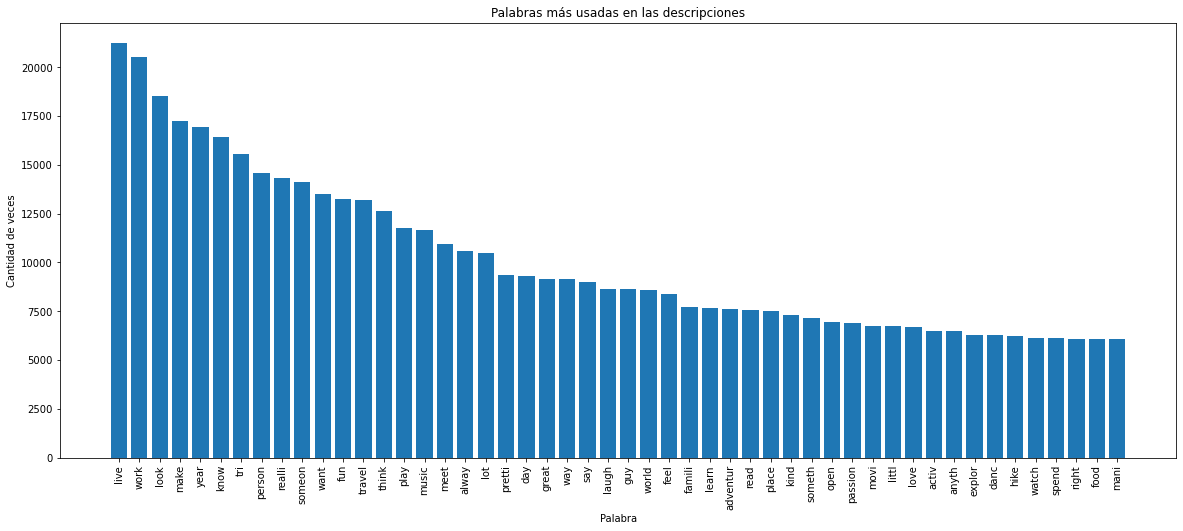

In [84]:
count_vectorizer = CountVectorizer(stop_words='english')
words, word_values = get_top_n_words(n_top_words=50, count_vectorizer=count_vectorizer, text_data=df_text_limpio["essay0"])

fig, ax = plt.subplots(figsize=(20,8))
ax.bar(range(len(words)), word_values);
ax.set_xticks(range(len(words)));
ax.set_xticklabels(words, rotation='vertical');
ax.set_title('Palabras más usadas en las descripciones');
ax.set_xlabel('Palabra');
ax.set_ylabel('Cantidad de veces');
plt.show()

In [85]:
top50_palabras_valores = pd.Series(word_values, name="Cant de veces utilizada")
top50_palabras = pd.Series(words, name="Palabra")
e0_palabras = pd.concat([top50_palabras, top50_palabras_valores], axis=1)
e0_palabras

,Palabra,Cant de veces utilizada
0,live,21214
1,work,20518
2,look,18498
3,make,17259
4,year,16909
5,know,16438
6,tri,15550
7,person,14587
8,realli,14296
9,someon,14135


# Acá arranco con la similitud de cosenos

#  Acá hay que reemplazar el "combinadoDF" por la versión final luego de clusterizar

In [86]:
#Copio el combinadoDf para sumarle la columna de essay0 con las descripciones (ya procesadas)
combinadoDf_tm = combinadoDf.copy()
combinadoDf_tm

,status,sex,orientation,body_type,diet,drinks,drugs,education,job,location,offspring,pets,smokes,cluster_predicho
0,single,m,straight,a little extra,strictly anything,socially,never,working on college/university,transportation,"south san francisco, california","doesn't have kids, but might want them",likes dogs and likes cats,sometimes,4
1,single,m,straight,average,mostly other,often,sometimes,working on space camp,hospitality / travel,"oakland, california","doesn't have kids, but might want them",likes dogs and likes cats,no,4
2,available,m,straight,thin,anything,socially,rather not say,graduated from masters program,rather not say,"san francisco, california",rather not say,has cats,no,0
3,single,m,straight,thin,vegetarian,socially,rather not say,working on college/university,student,"berkeley, california",doesn't want kids,likes cats,no,4
4,single,m,straight,athletic,rather not say,socially,never,graduated from college/university,artistic / musical / writer,"san francisco, california",rather not say,likes dogs and likes cats,no,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59941,single,f,straight,rather not say,rather not say,socially,never,graduated from college/university,sales / marketing / biz dev,"oakland, california",has kids,has dogs,no,3
59942,single,m,straight,fit,mostly anything,often,sometimes,working on college/university,entertainment / media,"san francisco, california",doesn't have kids,likes dogs and likes cats,no,1
59943,single,m,straight,average,mostly anything,not at all,never,graduated from masters program,construction / craftsmanship,"south san francisco, california",doesn't have kids,rather not say,no,0
59944,single,m,straight,athletic,mostly anything,socially,often,working on college/university,medicine / health,"san francisco, california","doesn't have kids, but wants them",likes dogs and likes cats,trying to quit,2


In [87]:
#Sumo la columna con el texto procesado
combinadoDf_tm = pd.concat([combinadoDf_tm, df_text_limpio], axis = 1).reset_index()
combinadoDf_tm

,index,status,sex,orientation,body_type,diet,drinks,drugs,education,job,location,offspring,pets,smokes,cluster_predicho,essay0
0,0,single,m,straight,a little extra,strictly anything,socially,never,working on college/university,transportation,"south san francisco, california","doesn't have kids, but might want them",likes dogs and likes cats,sometimes,4,would think kind intellectu either dumbest sma...
1,1,single,m,straight,average,mostly other,often,sometimes,working on space camp,hospitality / travel,"oakland, california","doesn't have kids, but might want them",likes dogs and likes cats,no,4,chef mean workahol cook regardless whether wor...
2,2,available,m,straight,thin,anything,socially,rather not say,graduated from masters program,rather not say,"san francisco, california",rather not say,has cats,no,0,asham much write public text onlin date site m...
3,3,single,m,straight,thin,vegetarian,socially,rather not say,working on college/university,student,"berkeley, california",doesn't want kids,likes cats,no,4,work librari go school
4,4,single,m,straight,athletic,rather not say,socially,never,graduated from college/university,artistic / musical / writer,"san francisco, california",rather not say,likes dogs and likes cats,no,0,go current vagu profil know come soon look mee...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59941,59941,single,f,straight,rather not say,rather not say,socially,never,graduated from college/university,sales / marketing / biz dev,"oakland, california",has kids,has dogs,no,3,vibrant express care optimist travel world sha...
59942,59942,single,m,straight,fit,mostly anything,often,sometimes,working on college/university,entertainment / media,"san francisco, california",doesn't have kids,likes dogs and likes cats,no,1,nick never know write sure hand southern calif...
59943,59943,single,m,straight,average,mostly anything,not at all,never,graduated from masters program,construction / craftsmanship,"south san francisco, california",doesn't have kids,rather not say,no,0,hello travel watch movi hang rule travel go pl...
59944,59944,single,m,straight,athletic,mostly anything,socially,often,working on college/university,medicine / health,"san francisco, california","doesn't have kids, but wants them",likes dogs and likes cats,trying to quit,2,world ball integr one take either away momma l...


In [88]:
#Separo según clusters
cluster_0_tm = combinadoDf_tm[combinadoDf_tm['cluster_predicho'] == 0]
cluster_1_tm = combinadoDf_tm[combinadoDf_tm['cluster_predicho'] == 1]
cluster_2_tm = combinadoDf_tm[combinadoDf_tm['cluster_predicho'] == 2]
cluster_3_tm = combinadoDf_tm[combinadoDf_tm['cluster_predicho'] == 3]
cluster_4_tm = combinadoDf_tm[combinadoDf_tm['cluster_predicho'] == 4]

### Cluster_0

In [89]:
#Funcion para tener la indexación de cada vectorizer
def indexar(df_cluster):
    indexer = []
    indexer.append(df_cluster.index)
    return indexer

In [90]:
def limpia_palabras(df):
    words = []
    for i in range(df.shape[1]):
        if df.iloc[:,i].sum() < 10:
            words.append(df.iloc[:,i].name)
    df = df.drop(words, axis=1)
    return df

In [91]:
cluster_0_tm_index = indexar(cluster_0_tm)
cluster_0_tm_index

[Int64Index([    2,     4,     5,     6,    10,    11,    12,    16,    17,
                18,
             ...
             59931, 59932, 59933, 59935, 59937, 59938, 59939, 59940, 59943,
             59945],
            dtype='int64', length=36799)]

In [93]:
#see:- https://kanoki.org/2018/12/27/text-matching-cosine-similarity/
vectorizer = TfidfVectorizer()
trsfm_0=vectorizer.fit_transform(cluster_0_tm["essay0"])
df_cluster_0 = pd.DataFrame(trsfm_0.toarray(),columns=vectorizer.get_feature_names_out(),index=cluster_0_tm_index)

In [94]:
df_cluster_0 = limpia_palabras(df_cluster_0)
df_cluster_0

,abandon,abil,abl,abroad,absolut,abstract,absurd,academ,academi,accent,...,younger,youngest,youth,youtub,yr,yrs,yup,zealand,zombi,zone
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59938,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
59939,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
59940,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
59943,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [177]:
perfil_usuario = trsfm_0[0]
# El perfil usuario es donde llegaría al ingresar el usuario, luego de ubicarlo en el cluster correcto
res_coseno = cosine_similarity( perfil_usuario, trsfm_0)

In [178]:
indice_coseno = df_cluster_0.reset_index()['level_0']

In [179]:
final = indice_coseno.to_frame()
final['res_coseno'] = res_coseno[0]
final = final.set_index('level_0')

In [180]:
recomendados = final.sort_values('res_coseno', ascending=False)[1:]

In [181]:
recomendados

,res_coseno
level_0,
57892,0.204339
6224,0.203970
4719,0.176196
48010,0.172751
58229,0.172655
...,...
14771,0.000000
46997,0.000000
31859,0.000000


# Desde acá no va

In [169]:
hoola

NameError: name 'hoola' is not defined

In [99]:
#Función para calcular la similitud de cosenos
def similitud_cosenos(trsfm):
    cos_sim = []
    #cosine_similarity(trsfm[0], trsfm)
    for i in range(trsfm.shape[0]):
        print("entro al ciclo")
        cos_sim.append(cosine_similarity( trsfm[0], trsfm))
        print("salgo al ciclo")
    return cos_sim

In [98]:
df_cos_sim_0 = pd.DataFrame(similitud_cosenos(trsfm_0))
df_cos_sim_0

entro al ciclo
salgo al ciclo


ValueError: Must pass 2-d input. shape=(1, 1, 36799)

### Cluster_1

In [ ]:
cluster_1_tm_index = indexar(cluster_1_tm)
cluster_1_tm_index

In [ ]:
trsfm_1=vectorizer.fit_transform(cluster_1_tm["essay0"])
df_cluster_1 = pd.DataFrame(trsfm_1.toarray(),columns=vectorizer.get_feature_names_out(),index=cluster_1_tm_index)
df_cluster_1 = limpia_palabras(df_cluster_1)
df_cluster_1

In [ ]:
df_cos_sim_1 = pd.DataFrame(similitud_cosenos(trsfm_1))
df_cos_sim_1

### Cluster_2

In [ ]:
cluster_2_tm_index = indexar(cluster_2_tm)
cluster_2_tm_index

In [ ]:
trsfm_2=vectorizer.fit_transform(cluster_2_tm["essay0"])
df_cluster_2 = pd.DataFrame(trsfm_2.toarray(),columns=vectorizer.get_feature_names_out(),index=cluster_2_tm_index)
df_cluster_2 = limpia_palabras(df_cluster_2)
df_cluster_2

In [ ]:
df_cos_sim_2 = pd.DataFrame(similitud_cosenos(trsfm_2))
df_cos_sim_2

### Cluster_3

In [ ]:
cluster_3_tm_index = indexar(cluster_3_tm)
cluster_3_tm_index

In [ ]:
trsfm_3=vectorizer.fit_transform(cluster_3_tm["essay0"])
df_cluster_3 = pd.DataFrame(trsfm_3.toarray(),columns=vectorizer.get_feature_names_out(),index=cluster_3_tm_index)
df_cluster_3 = limpia_palabras(df_cluster_3)
df_cluster_3

In [ ]:
df_cos_sim_3 = pd.DataFrame(similitud_cosenos(trsfm_3))
df_cos_sim_3

### Cluster_4

In [ ]:
cluster_4_tm_index = indexar(cluster_4_tm)
cluster_4_tm_index

In [ ]:
trsfm_4=vectorizer.fit_transform(cluster_4_tm["essay0"])
df_cluster_4 = pd.DataFrame(trsfm_4.toarray(),columns=vectorizer.get_feature_names_out(),index=cluster_4_tm_index)
df_cluster_4 = limpia_palabras(df_cluster_4)
df_cluster_4

In [ ]:
df_cos_sim_4 = pd.DataFrame(similitud_cosenos(trsfm_4))
df_cos_sim_4

# Funcion palabras

In [ ]:
df_cos_sin_0